# **Data augmentation DRAFT**

Voici une série de codes suppleémentaires qui n'ont pas été utilisées mais qui peuvent etre utiles pour continuer le projet

## **1.Codes Auxilliaire**


On récupère un fichier csv et qui importe ces données sous forme d'un dictionnaire 

In [2]:
import csv

def import_csv(file_path):
    data_dict = {}
    with open(file_path, newline='') as csvfile:
        csv_reader = csv.reader(csvfile, delimiter=',', quotechar='"')
        header = next(csv_reader)
        for row in csv_reader:
            key = row[0] # Il faut ici ici la colonne qui représente la clé du dictionnaire
            data_dict[key] = {}
            for i in range(1, len(header)):
                data_dict[key][header[i]] = row[i]
    return data_dict


On peut visualiser les coordonnées

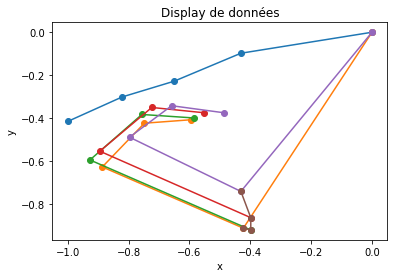

In [ ]:
import matplotlib.pyplot as plt

def process_coord_par_coord(coord):
    coord_processed = []
    c = 1

    while c < len(coord):
        coord_processed.append(coord[c:c+2])
        c += 2
    
    coord_processed = np.array(coord_processed)

    return coord_processed

def plot_hand(coordinates):
    coordinates_processed = process_coord_par_coord(coordinates) 
    thumb = coordinates_processed[0:5]
    index = np.concatenate(([coordinates_processed[0]],coordinates_processed[5:9]))
    middle = coordinates_processed[9:13]
    ring = coordinates_processed[13:17]
    tinky = np.concatenate(([coordinates_processed[0]],coordinates_processed[17:21]))
    phalange = np.concatenate(([coordinates_processed[5]],[coordinates_processed[9]],[coordinates_processed[13]]))
    phalange = np.concatenate((phalange,[coordinates_processed[17]]))

    fig, ax = plt.subplots()
    x_values_thumb = [c[0] for c in thumb] 
    y_values_thumb = [c[1] for c in thumb] 
    ax.plot(x_values_thumb, y_values_thumb, '-o') 

    x_values_index = [c[0] for c in index] 
    y_values_index = [c[1] for c in index] 
    ax.plot(x_values_index,  y_values_index, '-o') 

    x_values_middle = [c[0] for c in middle] 
    y_values_middle = [c[1] for c in middle] 
    ax.plot(x_values_middle, y_values_middle, '-o') 

    x_values_ring = [c[0] for c in ring] 
    y_values_ring = [c[1] for c in ring] 
    ax.plot(x_values_ring, y_values_ring, '-o') 

    x_values_tinky = [c[0] for c in tinky] 
    y_values_tinky = [c[1] for c in tinky] 
    ax.plot(x_values_tinky, y_values_tinky, '-o') 

    x_values_phalange = [c[0] for c in phalange] 
    y_values_phalange = [c[1] for c in phalange] 
    ax.plot(x_values_phalange, y_values_phalange, '-o') 
    
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Display de données')
    plt.show()
    

plot_hand(l_test)


On formate les données pour les utiliser dans les codes suivants

In [4]:
def process_coord(coord):
    coord_processed = [[],[],[]]

    for i in range (len(coord)):
        if i%3 == 0:
            coord_processed[0].append(coord[i])
        if i%3 == 1:
            coord_processed[1].append(coord[i])
        if i%3 == 2:
            coord_processed[2].append(coord[i])
    
    coord_processed = np.array(coord_processed)

    return coord_processed

def process_coord_v2(coord):
    coord_processed_v2 = []
    c = 0

    while c < len(coord):
        coord_processed_v2.append(coord[c:c+3])
        c += 3

    coord_processed_v2 = np.array(coord_processed_v2)
    
    return coord_processed_v2

### Méthodes de modification des données

In [5]:
import numpy as np
import random
from scipy.spatial.transform import Rotation


# Fonction pour effectuer une rotation de la figure autour de l'axe choisi aléatoirement
def rotation(coordinates, angle):

    theta = np.radians(angle)
    c, s = np.cos(theta), np.sin(theta)

    axe = random.choice(['x','y','z'])
    if axe == 'x':
        rotation_matrix = np.array(((1, 0, 0),(c, 0, -s), (s, 0, c)))
    if axe == 'y':
        rotation_matrix = np.array(((c, 0, -s),(0, 1, 0), (s, 0, c)))
    if axe == 'z':
        rotation_matrix = np.array(((c, 0, -s), (s, 0, c), (0, 0, 1)))
    rotated_coordinates = np.dot(coordinates, rotation_matrix)
    print (axe)

    return rotated_coordinates

def translation(coordinates, distance):
    
    axe = random.choice(['x','y','z'])
    if axe == 'x':
        translation_matrix = np.array((distance, 0, 0))
    if axe == 'y':
        translation_matrix = np.array((0, distance, 0))
    if axe == 'z':
        translation_matrix = np.array((0, 0, distance))
    translated_coordinates = coordinates + translation_matrix
    print(axe)

    return translated_coordinates

def dilatation(coord, dilatation_factor):
    coord = np.array(coord)
    dilatation_coords = coord * dilatation_factor
    return process_coord(dilatation_coords)

def amputation(list_coord, nom_membre, degré):
    list_coord = np.array(list_coord)
    
    for x in nom_membre:
        if x == 'thumb':
            list_coord.pop(2)
            list_coord.pop(3)
            if degré == 1 :
                list_coord.pop(4)
                list_coord.pop(5)
        if x == 'index':
            list_coord.pop(6)
            list_coord.pop(7)
            if degré == 1 :
                list_coord.pop(8)
                list_coord.pop(9)
        if x == 'middle':
            list_coord.pop(10)
            list_coord.pop(11)
            if degré == 1 :
                list_coord.pop(12)
                list_coord.pop(13)
        if x == 'ring':
            list_coord.pop(14)
            list_coord.pop(15)
            if degré == 1 :
                list_coord.pop(16)
                list_coord.pop(17)
        if x == 'pinky':
            list_coord.pop(18)
            list_coord.pop(19)
            if degré == 1 :
                list_coord.pop(20)
                list_coord.pop(21)
    return list_coord


## **3.Display**

Fonction qui affiche les coordonnées en 3D

In [101]:
import matplotlib.pyplot as plt

def plot_coordinates(coord):
    
    coord_processed = process_coord(coord)

    x = coord_processed[0]
    y = coord_processed[1]
    z = coord_processed[2]
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x, y, z)
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')    
    plt.show()

    return coord_processed

Fonction qui trace une main

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_hand(coordinates):
    coordinates_processed = process_coord_v2(coordinates) 
    thumb = coordinates_processed[0:4]
    index = np.concatenate([coordinates[0]],coordinates[5:8])
    middle = coordinates[9,12]
    ring = coordinates[13,16]
    tinky = np.concatenate([coordinates[0]],coordinates[17:20])
    phalange = np.concatenate([coordinates[5]],[coordinates[9]],[coordinates[13]],[coordinates[17]])

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    x_values_thumb = [c[0] for c in thumb] 
    y_values_thumb = [c[1] for c in thumb] 
    z_values_thumb = [c[2] for c in thumb] 
    ax.plot(x_values_thumb, y_values_thumb, z_values_thumb, '-o') 

    x_values_index = [c[0] for c in index] 
    y_values_index = [c[1] for c in index] 
    z_values_index = [c[2] for c in index] 
    ax.plot(x_values_index, y_values_index, z_values_index, '-o') 

    x_values_middle = [c[0] for c in middle] 
    y_values_middle = [c[1] for c in middle] 
    z_values_middle = [c[2] for c in middle] 
    ax.plot(x_values_middle, y_values_middle, z_values_middle, '-o') 

    x_values_ring = [c[0] for c in ring] 
    y_values_ring = [c[1] for c in ring] 
    z_values_ring = [c[2] for c in ring] 
    ax.plot(x_values_ring, y_values_ring, z_values_ring, '-o') 

    x_values_tinky = [c[0] for c in tinky] 
    y_values_tinky = [c[1] for c in tinky] 
    z_values_tinky = [c[2] for c in tinky] 
    ax.plot(x_values_tinky, y_values_tinky, z_values_tinky, '-o') 

    x_values_phalange = [c[0] for c in phalange] 
    y_values_phalange = [c[1] for c in phalange] 
    z_values_phalange = [c[2] for c in phalange] 
    ax.plot(x_values_phalange, y_values_phalange, z_values_phalange, '-o') 

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.show()

coordinates = np.array(([1,2,3,4,5,6,7]))
print(np.concatenate(([coordinates[0]],[coordinates[0]],[coordinates[0]])))


# **Tester les codes**

Array de test : [[0,0,0],[0,10,0],[10,0,0],[10,10,0],[0,0,10],[0,10,10],[10,0,10],[10,10,10]]

In [ ]:
coord_test = [0,0,0,0,10,0,10,0,0,10,10,0,0,0,10,0,10,10,10,0,10,10,10,10]
coord_test = np.array(coord_test)

print(process_coord(coord_test))
print(process_coord_v2(coord_test))

plot_coordinates(coord_test)

* TEST Dilatation

[[ 0.  0. 15. 15.  0.  0. 15. 15.]
 [ 0. 15.  0. 15.  0. 15.  0. 15.]
 [ 0.  0.  0.  0. 15. 15. 15. 15.]]


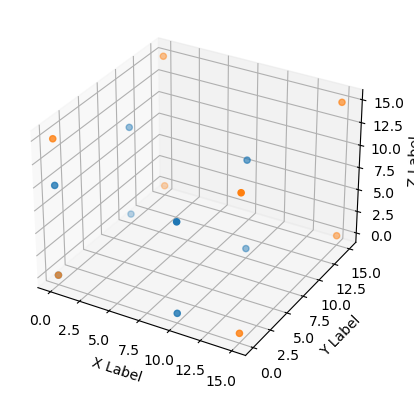

In [81]:
import numpy as np
import matplotlib.pyplot as plt

coord_processed = process_coord(coord_test)
x = coord_processed[0]
y = coord_processed[1]
z = coord_processed[2]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z)

# Test
dilatation_factor = 1.5 
dilated_coordinates = dilatation(coord_test.T, dilatation_factor)
print(dilated_coordinates)

x1 = dilated_coordinates[0]
y1 = dilated_coordinates[1]
z1 = dilated_coordinates[2]
ax.scatter(x1, y1, z1)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()



* TEST Rotation

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

coord_processed = process_coord(coord_test)
x = coord_processed[0]
y = coord_processed[1]
z = coord_processed[2]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z)

# Test
angle = 30 # degrés
rotated_coordinates = rotation(coord_processed.T, angle)
print(rotated_coordinates)

ax.scatter(rotated_coordinates[:,0], rotated_coordinates[:,1], rotated_coordinates[:,2])

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()


* TEST Translation

y


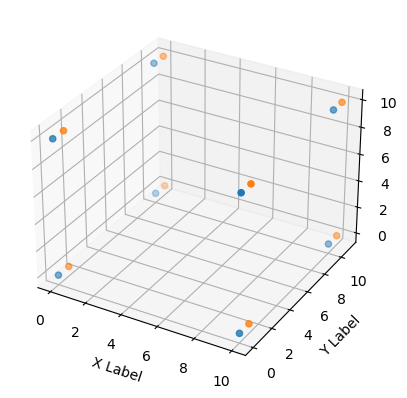

In [68]:
import numpy as np
import matplotlib.pyplot as plt


coord_processed = process_coord(coord_test)
x = coord_processed[0]
y = coord_processed[1]
z = coord_processed[2]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z)

# Test
distance = 1.0 # distance de translation
translated_coordinates = translation(coord_processed.T, distance)

ax.scatter(translated_coordinates[:,0], translated_coordinates[:,1], translated_coordinates[:,2])

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()
